In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from typing import List, Optional

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [2]:
PRINTABLE_MODEL_NAMES = {
    "deepsets_mlp_sum": "DeepSets using MLPs and Sum Pooling",
    "deepsets_mlp_fspool": "DeepSets using MLPs and FSPool Layer [INCOMPLETE]",
    "mlp": "MLP",
    "sorted_mlp": "Sorting followed by MLP",
    "pna": "Principal Neighbourhood Aggregation",
    "small_set_transformer": "Set Transformer (Small)"
}

PRINTABLE_METRICS = {
    "mse": "Mean Squared Error",
    "mae": "Mean Absolute Error",
    "med_ae": "Median Absolute Error",
    "max_error": "Max Error",
    "mape": "Mean Absolute Percentage Error",
    "r2": "R$^2$ Score",
}

PRINTABLE_LABELS = {
    "sum": "Sum",
    "largest_pair_sum": "Max. Sum of Pairs",
    "largest_triple_sum": "Max. Sum of Triples",
}

PRINTABLE_DATASETS = {
    "train": "Traing Set",
    "test": "Test Set",
}

CAP_SIZE = 5
LABEL_COLORS = {
    "sum": "r",
    "largest_pair_sum": "g",
    "largest_triple_sum": "b",
}
LABEL_FORMATS = {
    "sum": "-o",
    "largest_pair_sum": "-v",
    "largest_triple_sum": "-s",
}

def plot_metrics_results(results: pd.DataFrame, metric: str, title: str, ax: matplotlib.axes.Axes) -> None:
    set_sizes = results["max_set_size"].unique()
    for label in results["label"].unique():
        filtered_results = results[results["label"] == label]

        means = filtered_results.groupby(by="max_set_size").mean()["test_" + metric]
        stds = filtered_results.groupby(by="max_set_size").std()["test_" + metric]

        ax.errorbar(
            set_sizes,
            means,
            yerr=stds,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    ax.set_title(title)
    ax.set_xscale('log', base=2)
    ax.set_xlabel("Maximum Set Size")
    ax.set_ylabel(PRINTABLE_METRICS[metric])
    ax.legend()

def plot_metrics_results_overview(results: pd.DataFrame, model: str) -> None:
    metrics = ["mse", "mae", "med_ae", "max_error", "r2"] # N.B.: MAPE not included
    labels = results["label"].unique().tolist()

    filtered_results = results[["label", "max_set_size", "random_seed"] + ["test_" + metric for metric in metrics]]

    n_cols = len(metrics)
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(6 * n_cols, 6))
    fig.set_facecolor("white")
    fig.suptitle(PRINTABLE_MODEL_NAMES[model] + " - Metrics")
    plt.rcParams.update({'font.size': 14})

    for col, metric in enumerate(metrics):
        plot_metrics_results(
            filtered_results,
            metric=metric,
            title=PRINTABLE_METRICS[metric],
            ax=axes[col]
        )

    plt.tight_layout()
    plt.show()

def plot_label_stats(results: pd.DataFrame, dataset: str, ax: matplotlib.axes.Axes) -> None:
    set_sizes = results["max_set_size"].unique()

    for label in results["label"].unique():
        label_results = results[results["label"] == label]

        data = label_results[["max_set_size", f"{dataset}_label_mean"]]
        train_label_mean = data.groupby(by="max_set_size").mean()[f"{dataset}_label_mean"]

        data = label_results[["max_set_size", f"{dataset}_label_std"]]
        train_label_std = data.groupby(by="max_set_size").mean()[f"{dataset}_label_std"]

        ax.errorbar(
            set_sizes,
            train_label_mean,
            yerr=train_label_std,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    ax.set_xscale("log", base=2)
    ax.set_title(PRINTABLE_DATASETS[dataset] + " Label Mean")
    ax.set_xlabel("Maximum Set Size")
    ax.set_ylabel("Label Mean")
    ax.legend()

def plot_experiment_overview(results: pd.DataFrame, model: str) -> None:
    datasets = ["train", "test"]
    experiment_info = ["epochs"] + [dataset + "_label_mean" for dataset in datasets] + [dataset + "_label_std" for dataset in datasets]
    labels = results["label"].unique().tolist()

    filtered_results = results[["label", "max_set_size", "random_seed"] + experiment_info]

    n_cols = len(datasets) + 1 # +1 for epochs.
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(6 * n_cols, 6))
    fig.set_facecolor("white")
    fig.suptitle(PRINTABLE_MODEL_NAMES[model] + " - Experiment Statistics")
    plt.rcParams.update({'font.size': 14})

    for col, dataset in enumerate(datasets):
        plot_label_stats(results, dataset=dataset, ax=axes[col])

    set_sizes = results["max_set_size"].unique()
    for label in results["label"].unique():
        label_results = filtered_results[filtered_results["label"] == label]

        means = label_results.groupby(by="max_set_size").mean()["epochs"]
        stds = label_results.groupby(by="max_set_size").std()["epochs"]

        axes[-1].errorbar(
            set_sizes,
            means,
            yerr=stds,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    axes[-1].set_title("Final Training Epoch")
    axes[-1].set_xscale('log', base=2)
    axes[-1].set_xlabel("Maximum Set Size")
    axes[-1].set_ylabel("Epoch")
    axes[-1].legend()

    plt.tight_layout()
    plt.show()

def plot_model_results(model: str) -> None:
    results = pd.read_csv(os.path.join("set-size-sweep-results", f"{model}-diff-set-sizes-results.csv"))

    plot_metrics_results_overview(results, model=model)
    plot_experiment_overview(results, model=model)

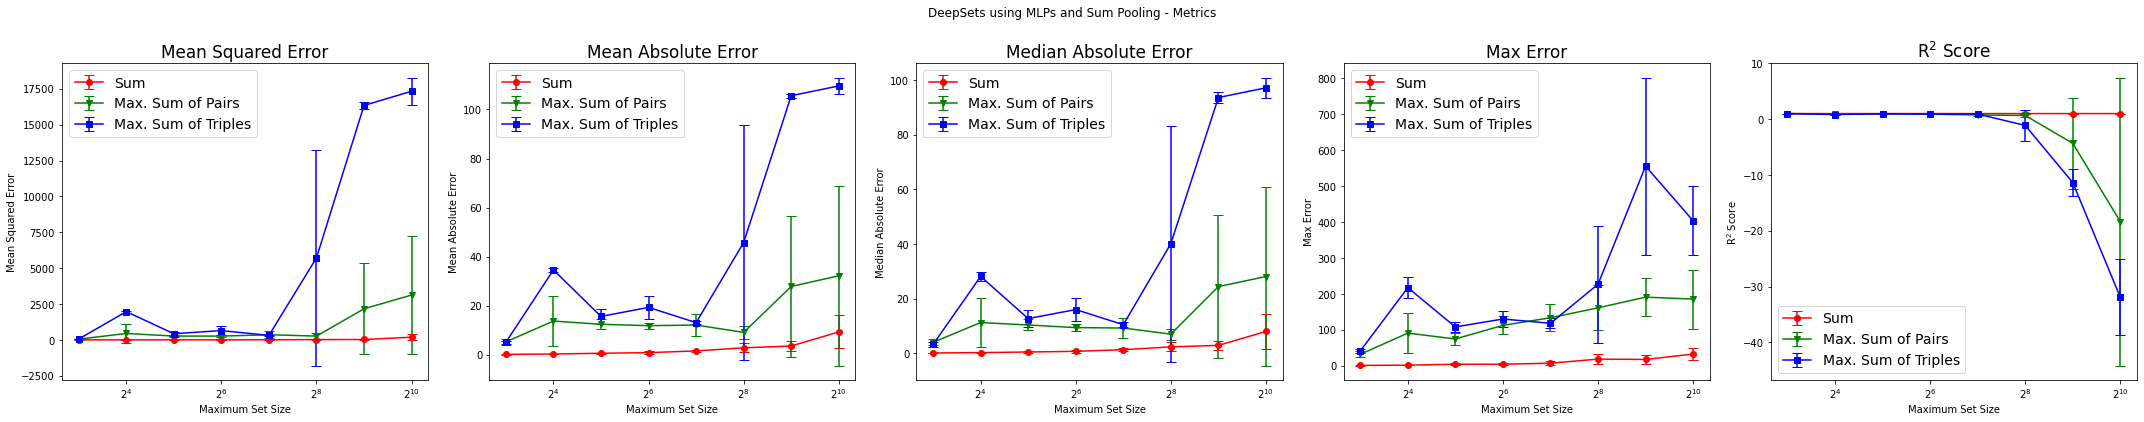

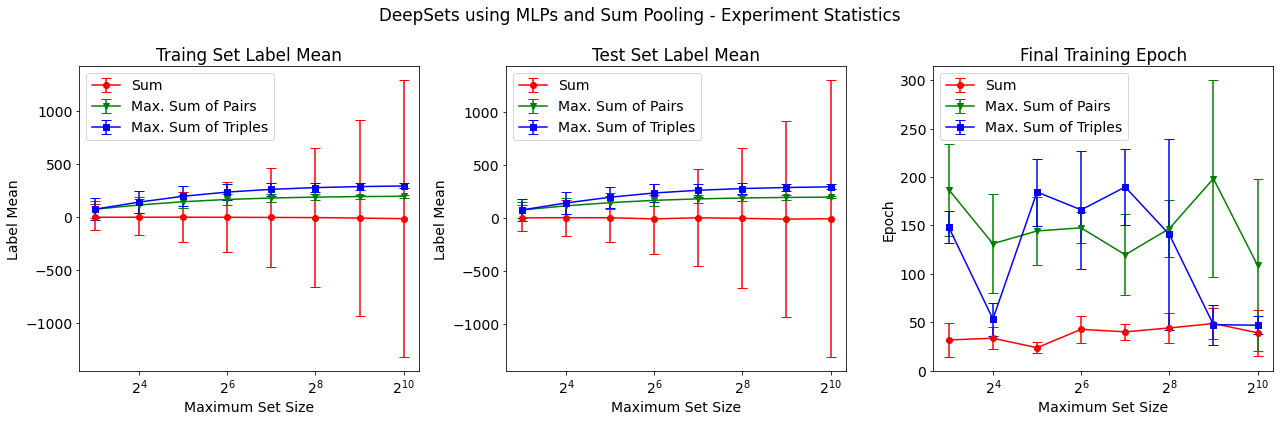

In [3]:
plot_model_results("deepsets_mlp_sum")

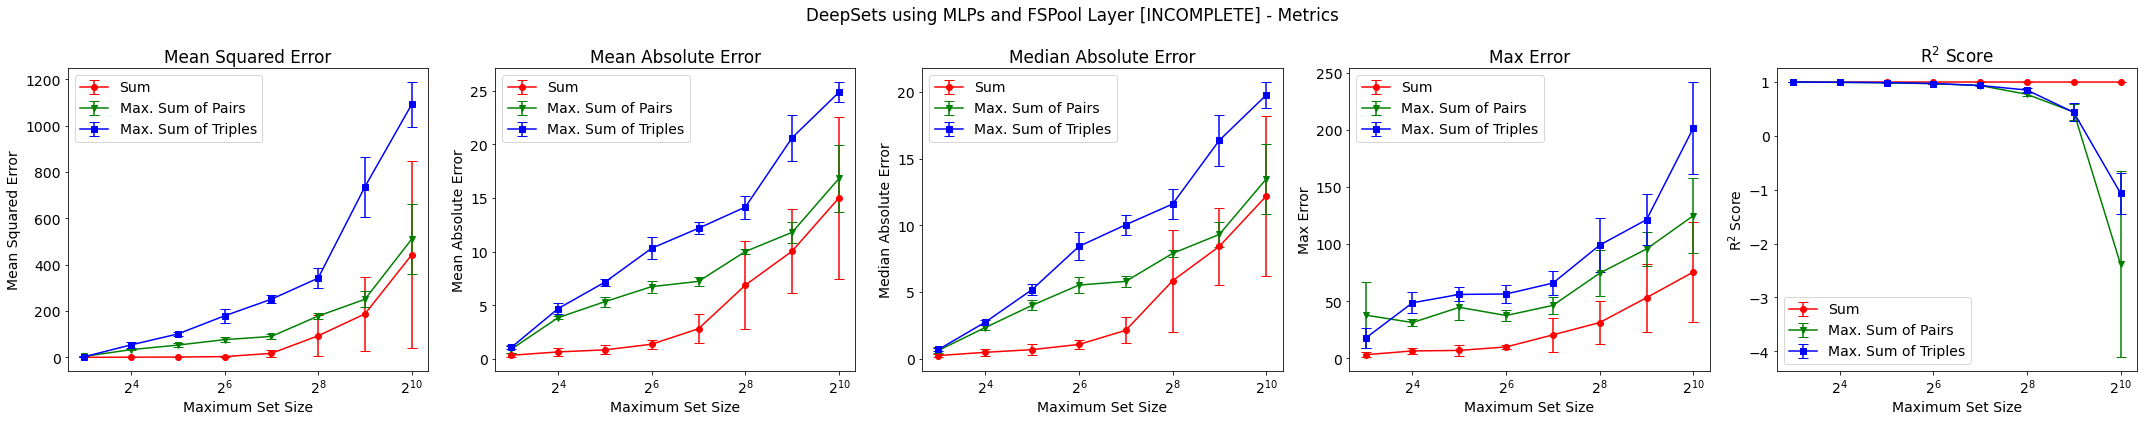

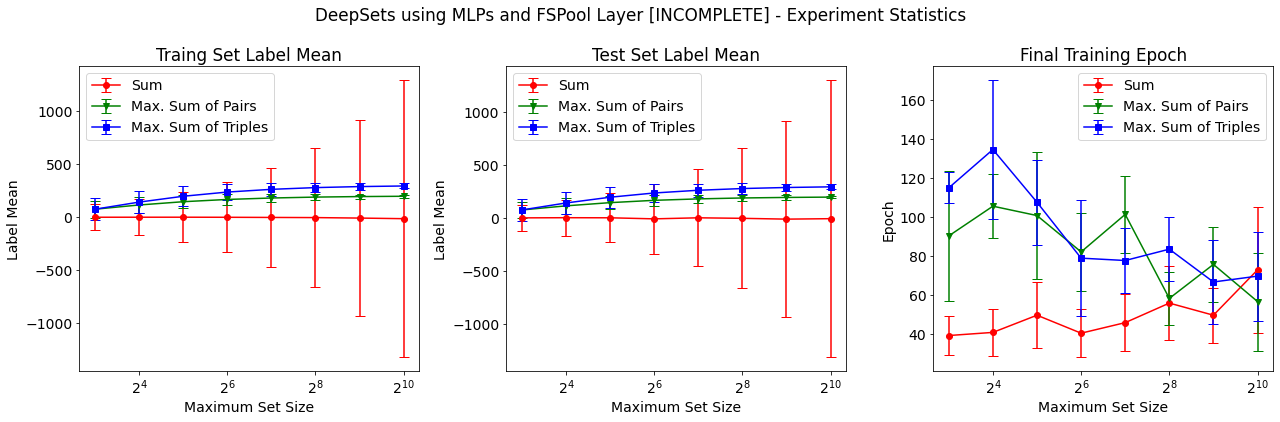

In [4]:
plot_model_results("deepsets_mlp_fspool")

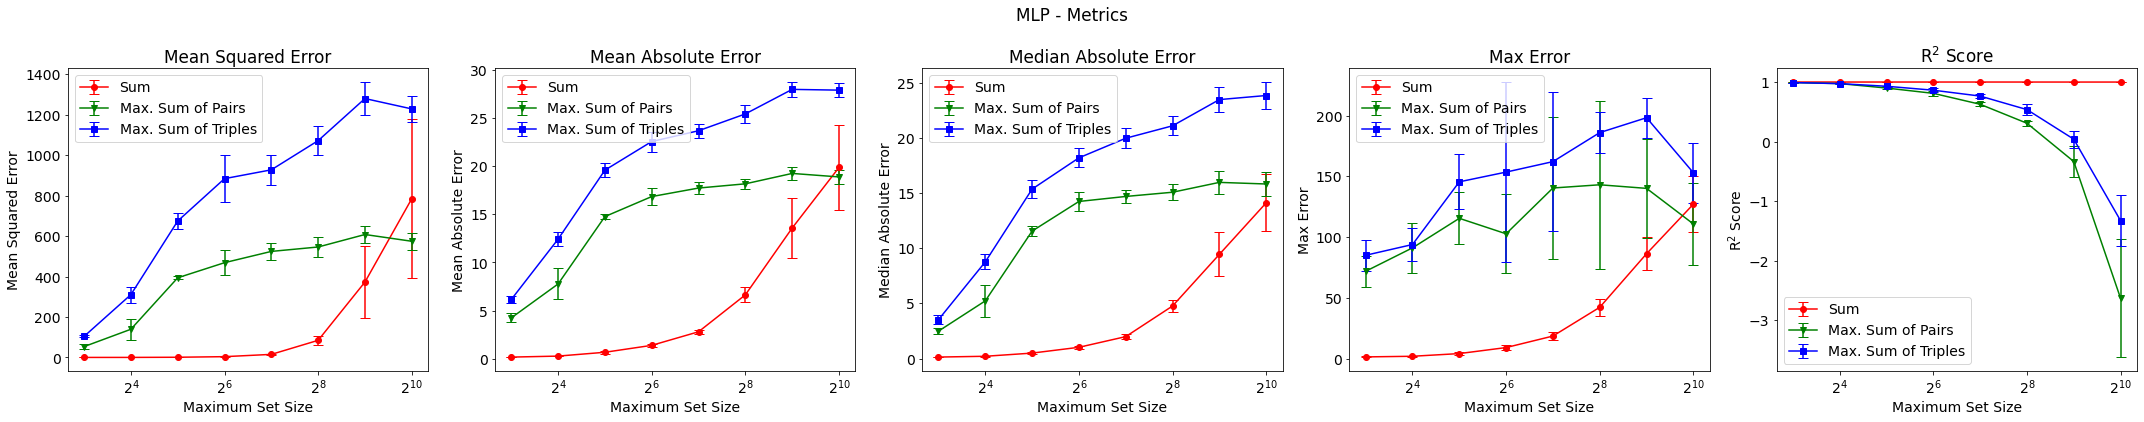

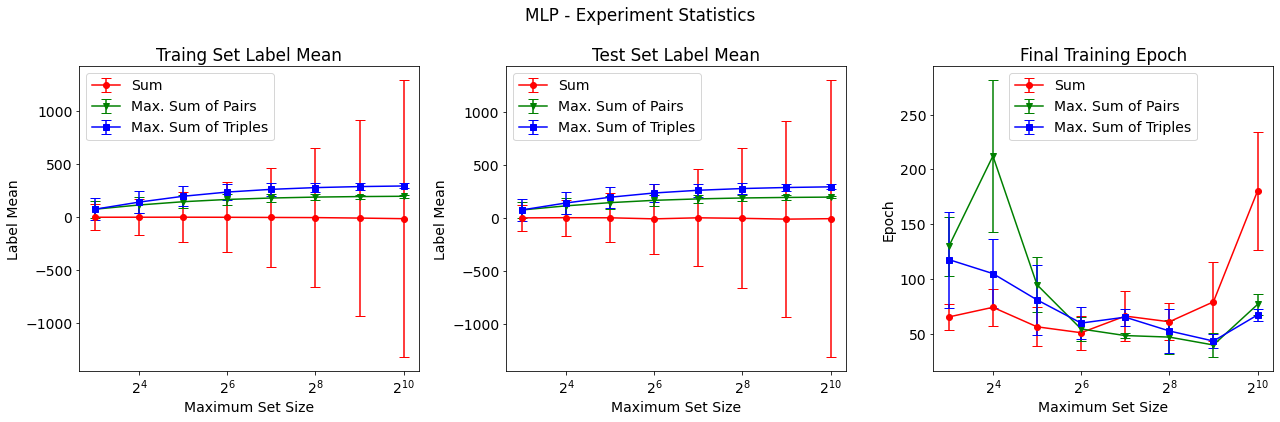

In [5]:
plot_model_results("mlp")

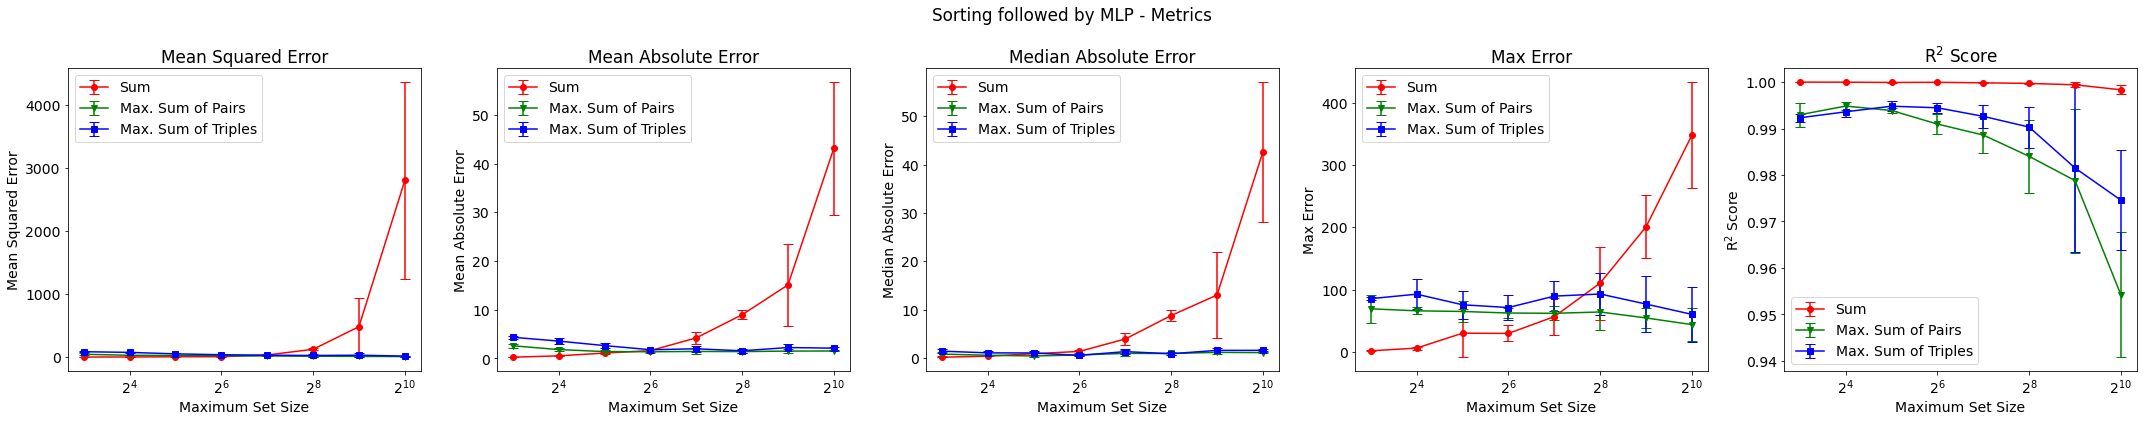

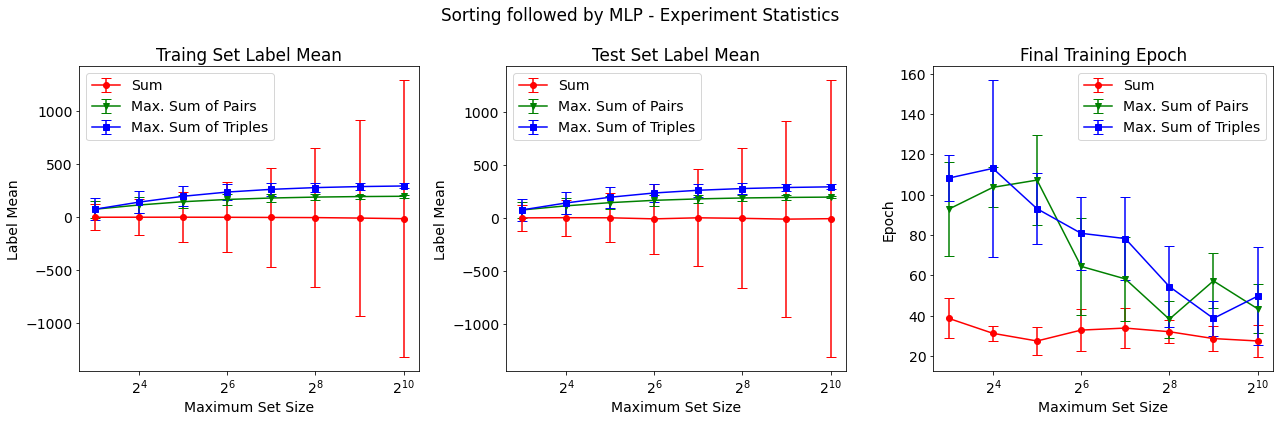

In [6]:
plot_model_results("sorted_mlp")

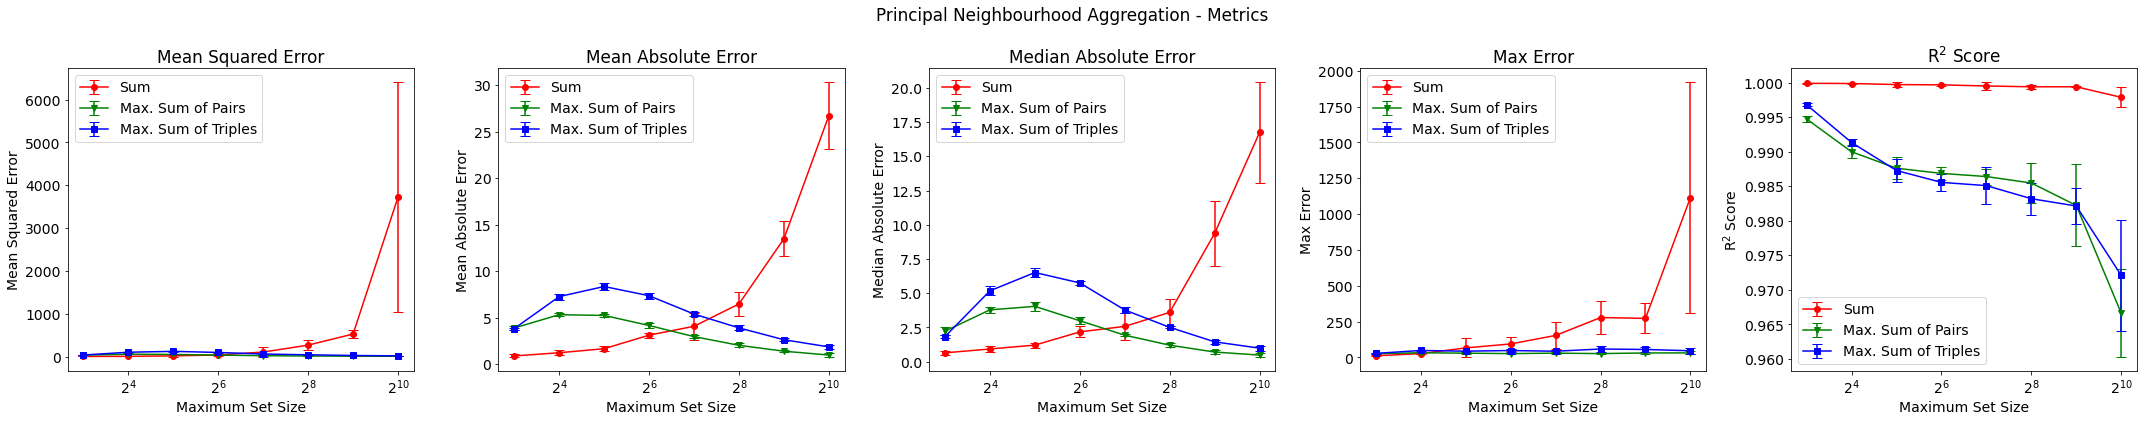

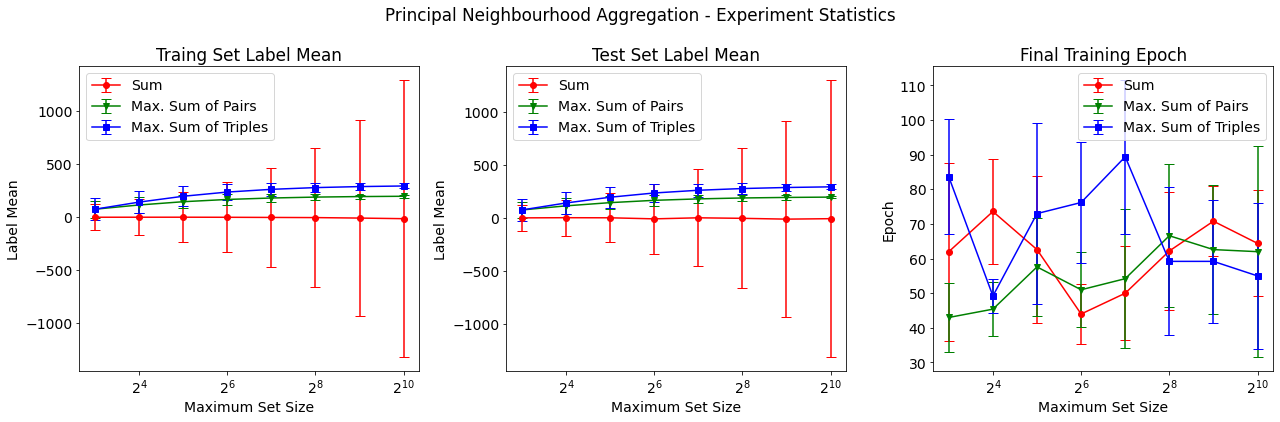

In [7]:
plot_model_results("pna")

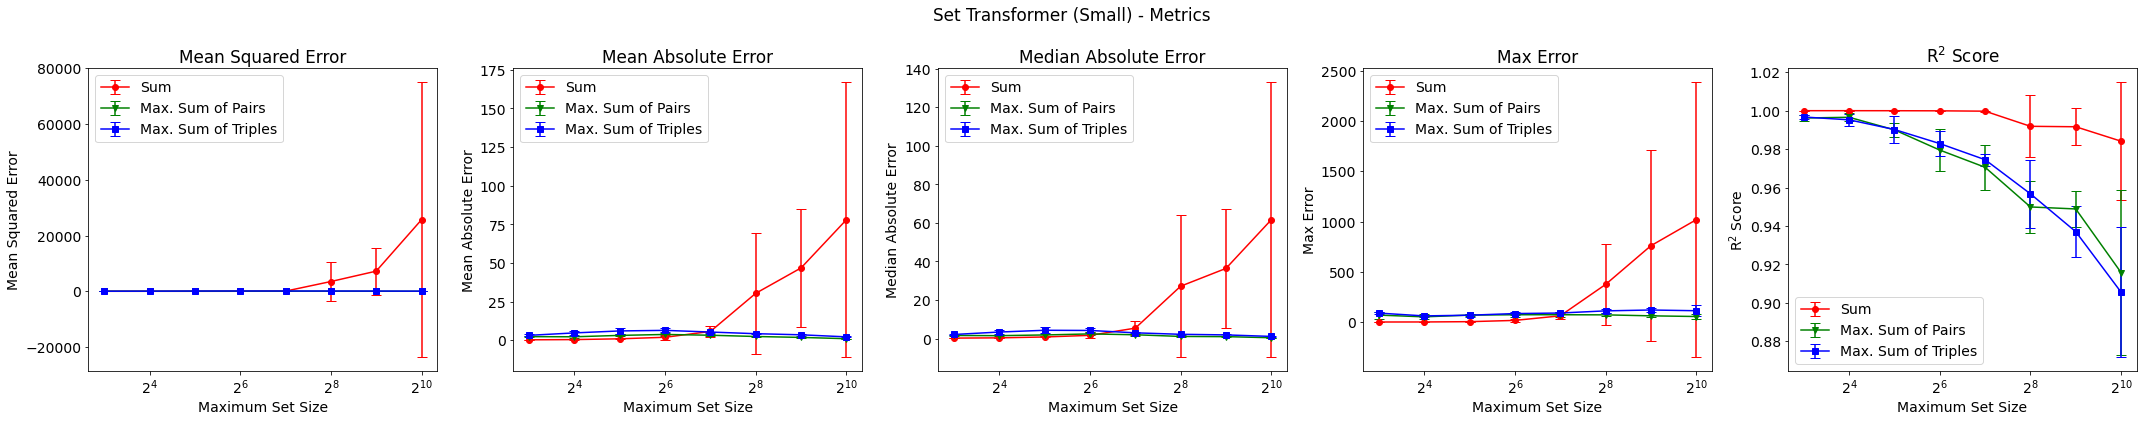

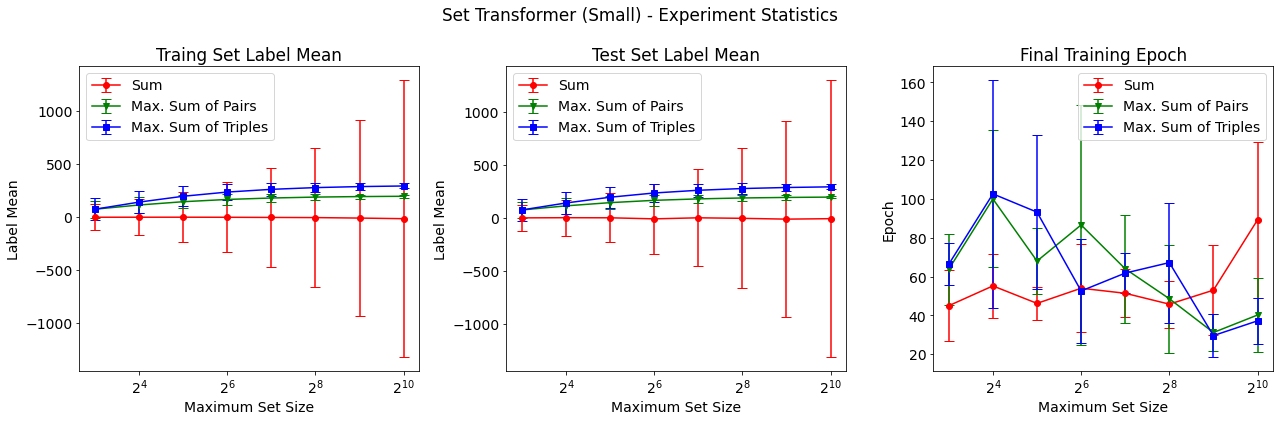

In [8]:
plot_model_results("small_set_transformer")

## Revised Plotting

In [1]:
%matplotlib inline
import os

from typing import List, Sequence, Any, Optional, Tuple

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# Ensure figure text is consistent with LaTex text.
# matplotlib.rcParams["text.usetex"] = True
# matplotlib.rcParams["font.family"] = "serif"
# matplotlib.rcParams["font.size"] = "11"

In [46]:
def filter_by_values(data: pd.DataFrame, column: str, values: Sequence[Any]) -> pd.DataFrame:
    return data[data[column].isin(values)]

def average_over_seeds(data: pd.DataFrame) -> pd.DataFrame:
    averaged_data = data.groupby(["model", "task"], as_index=False).mean()
    averaged_data.drop("seed", axis="columns", inplace=True)
    return averaged_data

class PlotableSequence:
    __slots__ = ["label", "data", "plot_range"]

    def __init__(
        self,
        label: str,
        data: Sequence[Any],
        plot_range: Optional[Tuple[float, float]] = None
    ):
        self.label = label
        self.data = data
        self.plot_range = plot_range

def plot_bars_with_std(
    title: str,
    x: PlotableSequence,
    y: PlotableSequence,
    models: Sequence[str],
    order: Sequence[str],
    ax: matplotlib.axes.Axes
) -> None:
    sns.barplot(
        x=x.data,
        y=y.data,
        hue=models,
        order=order,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel(x.label)
    if x.plot_range is not None:
        ax.set_xlim(x.plot_range)
    ax.set_ylabel(y.label)
    if y.plot_range is not None:
        ax.set_ylim(y.plot_range)
    ax.tick_params(axis='x', labelrotation=30)
    ax.get_legend().set_title("")
    ax.get_yaxis().grid(linestyle="dashed")

    # ax_twin_x = ax.twinx()

    # sns.lineplot(
    #     x=x.data,
    #     y=std.data,
    #     marker="o",
    #     color="black",
    #     ax=ax_twin_x
    # )
    # ax_twin_x.set_ylabel(std.label)
    # if x.plot_range is not None:
    #     ax_twin_x.set_xlim(x.plot_range)
    # if std.plot_range is not None:
    #     ax_twin_x.set_ylim(std.plot_range)
    # ax_twin_x.get_yaxis().grid(linestyle="dashed")

def adjusted_r2_score(data: pd.DataFrame) -> None:
    ## Computing Adjusted R^2 ###
    # Based on: https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2

    dof_res = data["sample_size"] - data["n_params"]
    dof_tot = data["sample_size"] - 1
    return 1 - (1 - data["r2"]) * (dof_tot / dof_res)

def std_scaled_mae(data: pd.DataFrame) -> pd.Series:
    return data["mae"] / data["std"]

def relative_mae(data: pd.DataFrame, baseline_model: str) -> pd.Series:
    baseline = data[data["model"] == baseline_model]
    baseline_vals = baseline[["task", "mae"]].to_dict(orient="records")
    baseline_maes = {val["task"]: val["mae"] for val in baseline_vals}

    return results.apply(lambda r: r["mae"] / baseline_maes[r["task"]], axis=1)

In [72]:
def get_result_paths(directory: str):
    return [os.path.join(directory, f) for f in os.listdir(directory)]

# result_paths = get_result_paths("set-size-sweep-results") + get_result_paths("set-size-sweep-2-results")
result_paths = get_result_paths("set-size-sweeps-overall")
result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
# for df in result_dfs:
#     display(df)
# for res, path in zip([(list(df["type"].unique()), list(df["label"].unique())) for df in result_dfs], result_paths):
#     print(path)
#     print(res)
results = pd.concat([
    df[[
        "type",
        "label",
        "test_label_std",
        "test_mae",
        "test_r2",
        "random_seed"
    ]]
for df in result_dfs])

#################
# Preprocessing #
#################

results = results.rename(
    columns={
        "type": "model",
        "label": "task",
        "test_label_std": "std",
        "test_mae": "mae",
        "test_r2": "r2",
        "random_seed": "seed",
    }
)

results = filter_by_values(
    results,
    "task", 
    values=[
        "sum",
        "largest_pair_sum",
        "largest_triple_sum",
        "longest_seq_length",
        "largest_contiguous_sum",
        "max",
        "cardinality"
    ]
)

results = filter_by_values(
    results,
    "model",
    values=[
        "deepsets_mlp_sum",
        "deepsets_mlp_fspool",
        "sorted_mlp",
        "mlp",
        "pna",
        "small_set_transformer"
    ]
)

results = average_over_seeds(results)

results = results[["model", "task", "std", "mae", "r2"]]

NEW_MODEL_NAMES = {
    "deepsets_mlp_sum": "DeepSets",
    "deepsets_mlp_fspool": "DeepSets + FSPool",
    "sorted_mlp": "Sorting + MLP",
    "mlp": "MLP",
    "pna": "PNA",
    "small_set_transformer": "Set Transformer"    
}

for old, new in NEW_MODEL_NAMES.items():
    results = results.replace(
        to_replace=old,
        value=new
    )

NEW_TASK_NAMES = {
    "sum": "Sum",
    "largest_pair_sum": "Max. Pair Sum",
    "largest_triple_sum": "Max. Trip. Sum",
    "longest_seq_length": "Max. Seq. Len.",
    "largest_contiguous_sum": "Max. Contig. Sum",
    "max": "Max.",
    "cardinality": "Cardinality"
}

for old, new in NEW_MODEL_NAMES.items():
    results = results.replace(
        to_replace=old,
        value=new
    )

for old, new in NEW_TASK_NAMES.items():
    results = results.replace(
        to_replace=old,
        value=new
    )

display(results)

/var/folders/96/14kr_nsn74ngf453zcq6z0v40000gn/T/ipykernel_46097/4182032442.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
/var/folders/96/14kr_nsn74ngf453zcq6z0v40000gn/T/ipykernel_46097/4182032442.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
/var/folders/96/14kr_nsn74ngf453zcq6z0v40000gn/T/ipykernel_46097/4182032442.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  result_dfs = [pd.read_csv(path, index_col=False) for path in result_paths if "classification" not in path]
/var/folders/96/14kr_nsn74ngf453zcq6z0v40000gn/T/ipykernel

,model,task,std,mae,r2
0,DeepSets + FSPool,Cardinality,3.662723,14.621435,1.048907
1,DeepSets + FSPool,Max. Contig. Sum,3.662723,5519.864900,2.742595
2,DeepSets + FSPool,Max. Pair Sum,45.625820,7.848754,0.464138
3,DeepSets + FSPool,Max. Trip. Sum,70.353105,11.892958,0.639504
4,DeepSets + FSPool,Max. Seq. Len.,3.662723,2276.088861,5.833031
5,DeepSets + FSPool,Max.,3.662723,57.488517,2.793628
6,DeepSets + FSPool,Sum,526.909562,4.759006,0.999887
7,DeepSets,Cardinality,3.662723,2.566559,0.059547
8,DeepSets,Max. Contig. Sum,3.662723,10094.326684,3.524869
9,DeepSets,Max. Pair Sum,45.625820,15.576144,-2.194661


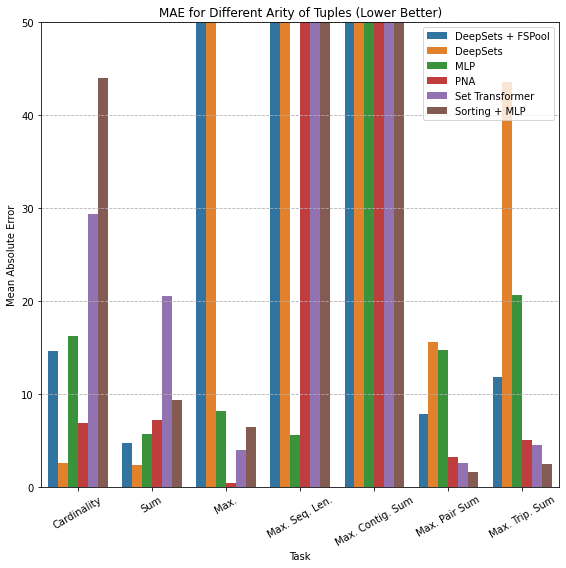

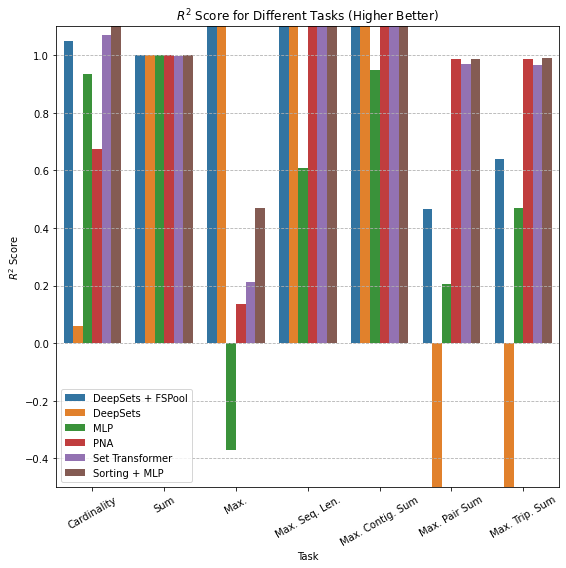

In [73]:
############
# Plotting #
############

fig, axes = plt.subplots(1, 1, figsize=(8,8))
fig.set_facecolor("white")

plot_bars_with_std(
    title="MAE for Different Arity of Tuples (Lower Better)",
    x=PlotableSequence("Task", results["task"]),
    y=PlotableSequence("Mean Absolute Error", results["mae"], plot_range=(0.0, 50.0)),
    models=results["model"],
    order=[
        NEW_TASK_NAMES[t] for t in [
            "cardinality",
            "sum",
            "max",
            "longest_seq_length",
            "largest_contiguous_sum",
            "largest_pair_sum",
            "largest_triple_sum",
        ]
    ],

    ax=axes
)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(8,8))
fig.set_facecolor("white")

plot_bars_with_std(
    title="$R^2$ Score for Different Tasks (Higher Better)",
    x=PlotableSequence("Task", results["task"]),
    y=PlotableSequence("$R^2$ Score", results["r2"], plot_range=(-0.5, 1.1)),
    models=results["model"],
    order=[
        NEW_TASK_NAMES[t] for t in [
            "cardinality",
            "sum",
            "max",
            "longest_seq_length",
            "largest_contiguous_sum",
            "largest_pair_sum",
            "largest_triple_sum",
        ]
    ],
    ax=axes
)

plt.tight_layout()
plt.show()

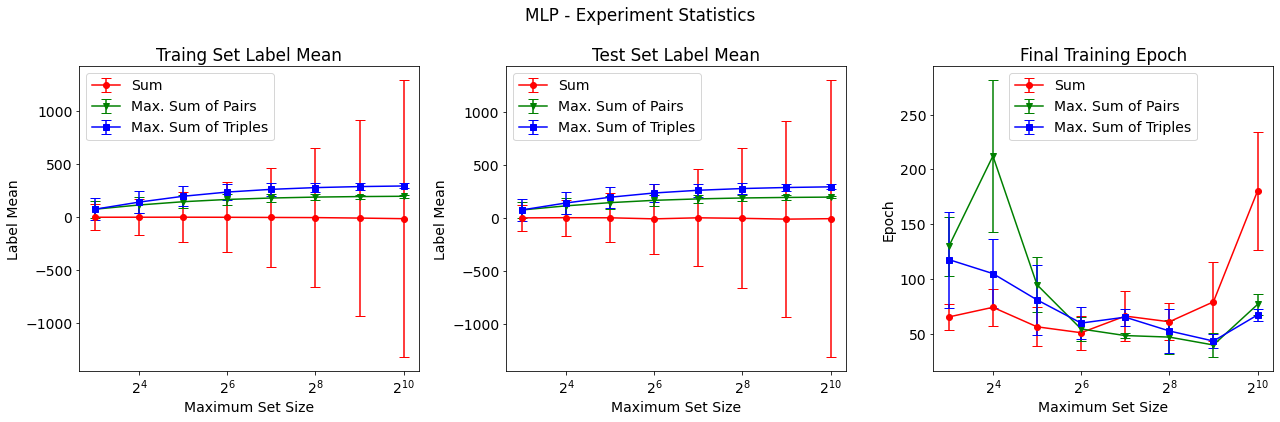

In [79]:
PRINTABLE_MODEL_NAMES = {
    "deepsets_mlp_sum": "DeepSets using MLPs and Sum Pooling",
    "deepsets_mlp_fspool": "DeepSets using MLPs and FSPool Layer [INCOMPLETE]",
    "mlp": "MLP",
    "sorted_mlp": "Sorting followed by MLP",
    "pna": "Principal Neighbourhood Aggregation",
    "small_set_transformer": "Set Transformer (Small)"
}

PRINTABLE_METRICS = {
    "mse": "Mean Squared Error",
    "mae": "Mean Absolute Error",
    "med_ae": "Median Absolute Error",
    "max_error": "Max Error",
    "mape": "Mean Absolute Percentage Error",
    "r2": "R$^2$ Score",
}

PRINTABLE_LABELS = {
    "sum": "Sum",
    "largest_pair_sum": "Max. Sum of Pairs",
    "largest_triple_sum": "Max. Sum of Triples",
}

PRINTABLE_DATASETS = {
    "train": "Traing Set",
    "test": "Test Set",
}

CAP_SIZE = 5
LABEL_COLORS = {
    "sum": "r",
    "largest_pair_sum": "g",
    "largest_triple_sum": "b",
}
LABEL_FORMATS = {
    "sum": "-o",
    "largest_pair_sum": "-v",
    "largest_triple_sum": "-s",
}

def plot_label_stats(results: pd.DataFrame, dataset: str, ax: matplotlib.axes.Axes) -> None:
    set_sizes = results["max_set_size"].unique()

    for label in results["label"].unique():
        label_results = results[results["label"] == label]

        data = label_results[["max_set_size", f"{dataset}_label_mean"]]
        train_label_mean = data.groupby(by="max_set_size").mean()[f"{dataset}_label_mean"]

        data = label_results[["max_set_size", f"{dataset}_label_std"]]
        train_label_std = data.groupby(by="max_set_size").mean()[f"{dataset}_label_std"]

        ax.errorbar(
            set_sizes,
            train_label_mean,
            yerr=train_label_std,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    ax.set_xscale("log", base=2)
    ax.set_title(PRINTABLE_DATASETS[dataset] + " Label Mean")
    ax.set_xlabel("Maximum Set Size")
    ax.set_ylabel("Label Mean")
    ax.legend()

def plot_label_std(results: pd.DataFrame, model: str) -> None:
    datasets = ["train", "test"]
    experiment_info = ["epochs"] + [dataset + "_label_mean" for dataset in datasets] + [dataset + "_label_std" for dataset in datasets]
    labels = results["label"].unique().tolist()

    filtered_results = results[["label", "max_set_size", "random_seed"] + experiment_info]

    n_cols = len(datasets) + 1 # +1 for epochs.
    fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(6 * n_cols, 6))
    fig.set_facecolor("white")
    fig.suptitle(PRINTABLE_MODEL_NAMES[model] + " - Experiment Statistics")
    plt.rcParams.update({'font.size': 14})

    for col, dataset in enumerate(datasets):
        plot_label_stats(results, dataset=dataset, ax=axes[col])

    set_sizes = results["max_set_size"].unique()
    for label in results["label"].unique():
        label_results = filtered_results[filtered_results["label"] == label]

        means = label_results.groupby(by="max_set_size").mean()["epochs"]
        stds = label_results.groupby(by="max_set_size").std()["epochs"]

        axes[-1].errorbar(
            set_sizes,
            means,
            yerr=stds,
            fmt=LABEL_FORMATS[label],
            capsize=CAP_SIZE,
            color=LABEL_COLORS[label],
            label=PRINTABLE_LABELS[label]
        )
    axes[-1].set_title("Final Training Epoch")
    axes[-1].set_xscale('log', base=2)
    axes[-1].set_xlabel("Maximum Set Size")
    axes[-1].set_ylabel("Epoch")
    axes[-1].legend()

    plt.tight_layout()
    plt.show()

plot_label_std(pd.read_csv("set-size-sweeps-overall/mlp-diff-set-sizes-results.csv"), "mlp")